In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
from ggplot import *
from sklearn.decomposition import PCA
import os

RDKit WARNING: [15:01:43] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
oxrs = [("CHEMBL3098111", "Merck" ),  ("CHEMBL3867477", "Merck" ),  ("CHEMBL2380240", "Rottapharm" ),
             ("CHEMBL3352684", "Merck" ),  ("CHEMBL3769367", "Merck" ),  ("CHEMBL3526050", "Actelion" ),
             ("CHEMBL3112474", "Actelion" ),  ("CHEMBL3739366", "Heptares" ),  ("CHEMBL3739395", "Actelion" ), 
             ("CHEMBL3351489", "Eisai" )]

In [3]:
fps = []
docs = []
companies = []

for cid, company in oxrs:
    sdf_file = os.path.join("ch08", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)

RDKit ERROR: [15:01:44] ERROR: Counts line too short: '' on line90
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line175
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line180
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line185
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line190
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line195
RDKit ERROR: [15:01:44] ERROR: moving to the begining of the next molecule
RDKit ERROR: [15:01:44] ERROR: Counts line too short: '$$$$' on line200
RDKit ERROR: [15:01:44] ERROR: moving to the begini

In [4]:
fps.shape

(293, 2048)

In [5]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [6]:
d = pd.DataFrame(x)
d.columns = ["PCA1", "PCA2"]
d["DOCID"] = docs
d["COMPANY"] = companies 

In [7]:
g = ggplot(aes(x="PCA1", y="PCA2", color="COMPANY"), data=d) + geom_point() + xlab("X") + ylab("Y")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

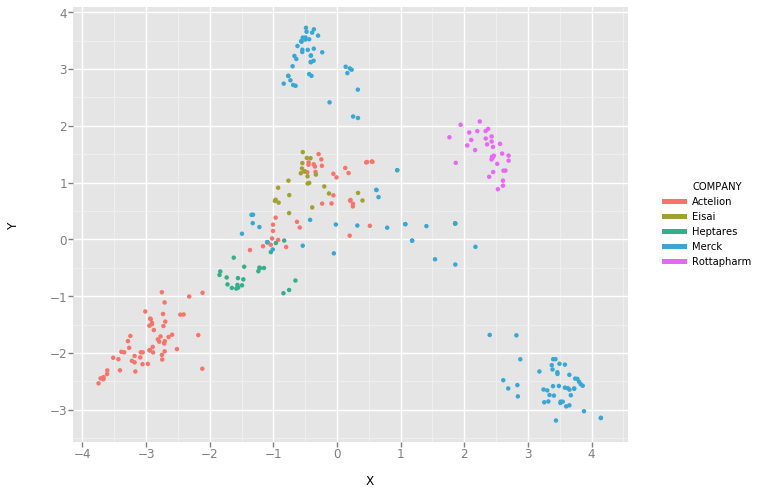

<ggplot: (-9223363290204886328)>

In [8]:
g

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

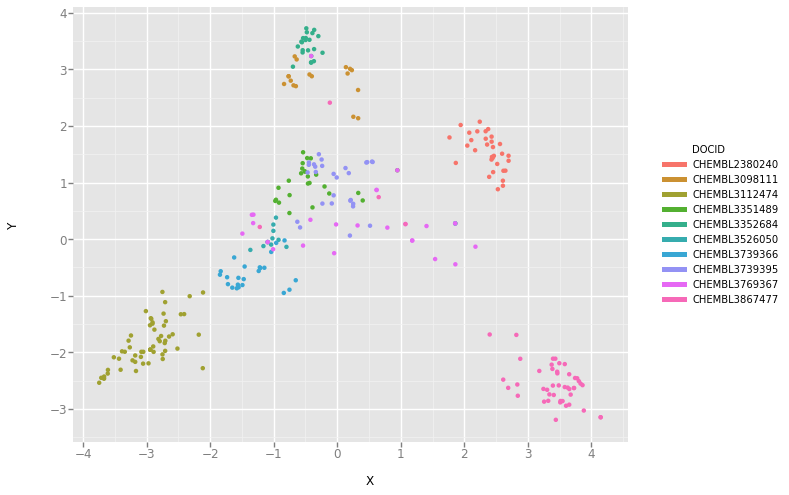

<ggplot: (8746649786842)>

In [9]:
g = ggplot(aes(x="PCA1", y="PCA2", color="DOCID"), data=d) + geom_point() + xlab("X") + ylab("Y")
g

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(fps)

In [12]:
d = pd.DataFrame(tx)
d.columns = ["PCA1", "PCA2"]
d["DOCID"] = docs
d["COMPANY"] = companies 
g = ggplot(aes(x="PCA1", y="PCA2", color="COMPANY"), data=d) + geom_point() + xlab("X") + ylab("Y")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

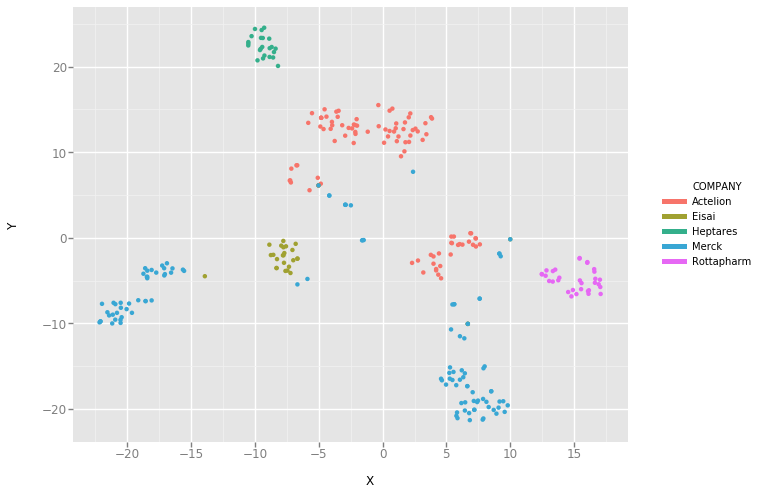

<ggplot: (8746646441080)>

In [13]:
g

### HDBSCANを使って化合物セットにクラスターラベルをつける

In [14]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit import RDLogger
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from mlinsights.mlmodel import PredictableTSNE
from hdbscan import HDBSCAN

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
RDLogger.DisableLog('rdApp.*')
seed = 794

fps = []
docs = []
companies = []
mol_list = []
for cid, company in oxrs:
    sdf_file = os.path.join("ch08", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            mol_list.append(mol)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps, dtype=np.int32)
companies = np.array(companies)
docs = np.array(docs)

trainIDX, testIDX = train_test_split(range(len(fps)), random_state=seed)

#### 距離関数の定義

In [15]:
def tanimoto_dist(ar1, ar2):
    a = np.dot(ar1, ar2)
    b = ar1 + ar2 - ar1*ar2
    return 1 - a/np.sum(b)

clusterer = HDBSCAN(algorithm='best', min_samples=5, metric='pyfunc', func=tanimoto_dist)
clusterer.fit(fps)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='pyfunc', min_cluster_size=5, min_samples=5, p=None,
        prediction_data=False)

#### まずは普通にプロット

In [16]:
tsne = TSNE(random_state=seed)
res = tsne.fit_transform(fps)

<Figure size 432x288 with 0 Axes>

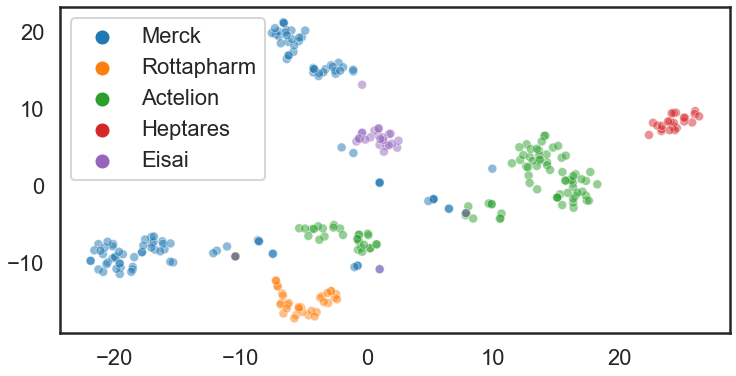

In [17]:
plt.clf()
plt.figure(figsize=(12, 6))
sns.scatterplot(res[:,0], res[:,1], hue=companies, **plot_kwds)

#### HDBSCANのラベルをつけてプロット

<Figure size 432x288 with 0 Axes>

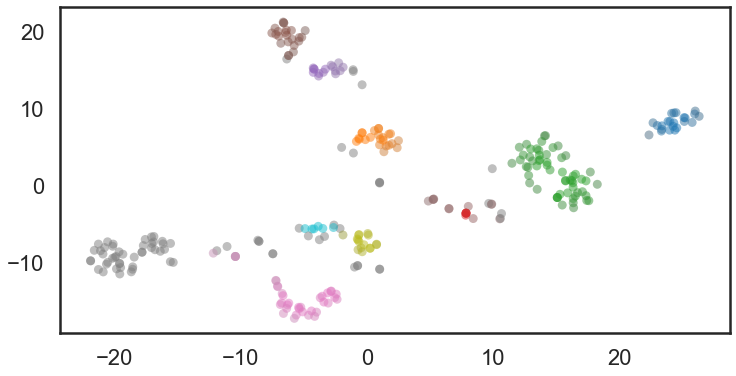

In [18]:
plt.clf()
plt.figure(figsize=(12, 6))
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                 if col >= 0 else (0.5, 0.5, 0.5) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(res[:,0], res[:,1], c=cluster_colors, **plot_kwds)

### TSNEを利用し新しい化合物を既存のケミカルスペースにプロットする

In [19]:
trainFP = [fps[i] for i in trainIDX]
train_mol = [mol_list[i] for i in trainIDX]

testFP = [fps[i] for i in testIDX]
test_mol = [mol_list[i] for i in testIDX]

<Figure size 432x288 with 0 Axes>

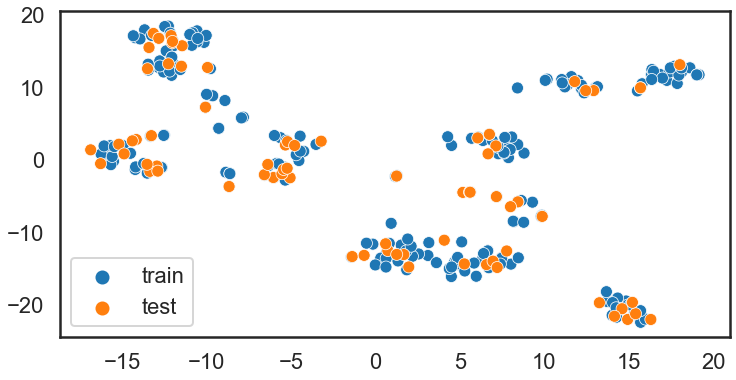

In [20]:
allFP = trainFP + testFP
tsne_ref = TSNE(random_state=seed)
res = tsne_ref.fit_transform(allFP)
plt.clf()
plt.figure(figsize=(12, 6))
sns.scatterplot(res[:,0], res[:,1], hue=['train' for i in range(len(trainFP))] + ['test' for i in range(len(testFP))])

In [21]:
rfr = RandomForestRegressor(random_state=seed)
tsne1 = TSNE(random_state=seed)
pred_tsne_rfr = PredictableTSNE(transformer=tsne1, estimator=rfr, keep_tsne_outputs=True)
pred_tsne_rfr.fit(trainFP, list(range(len(trainFP))))

/home/takayuki/anaconda3/envs/chemo37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


PredictableTSNE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators='warn',
                                                n_jobs=None, oob_score=False,
                                                random_state=794, verbose=0,
                                                warm_start=False),
                keep_tsne_outputs=True, normalize=True, normali

<Figure size 432x288 with 0 Axes>

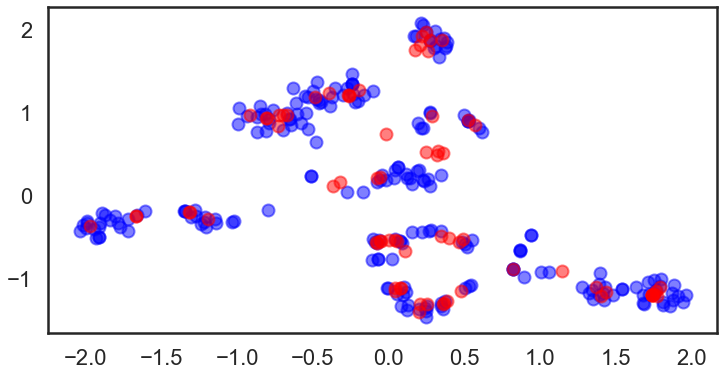

In [22]:
pred1 = pred_tsne_rfr.transform(testFP)
plt.clf()
plt.figure(figsize=(12, 6))
plt.scatter(pred_tsne_rfr.tsne_outputs_[:,0], pred_tsne_rfr.tsne_outputs_[:,1], c='blue', alpha=0.5)
plt.scatter(pred1[:,0], pred1[:,1], c='red', alpha=0.5)

In [23]:
gbr = GaussianProcessRegressor(random_state=seed)
tsne2 = TSNE(random_state=seed)
pred_tsne_gbr = PredictableTSNE(transformer=tsne2, estimator=gbr, keep_tsne_outputs=True)
pred_tsne_gbr.fit(trainFP, list(range(len(trainFP))))

PredictableTSNE(estimator=GaussianProcessRegressor(alpha=1e-10,
                                                   copy_X_train=True,
                                                   kernel=None,
                                                   n_restarts_optimizer=0,
                                                   normalize_y=False,
                                                   optimizer='fmin_l_bfgs_b',
                                                   random_state=794),
                keep_tsne_outputs=True, normalize=True, normalizer=None,
                transformer=TSNE(angle=0.5, early_exaggeration=12.0,
                                 init='random', learning_rate=200.0,
                                 method='barnes_hut', metric='euclidean',
                                 min_grad_norm=1e-07, n_components=2,
                                 n_iter=1000, n_iter_without_progress=300,
                                 perplexity=30.0, random_state=794, verbose=0))

<Figure size 432x288 with 0 Axes>

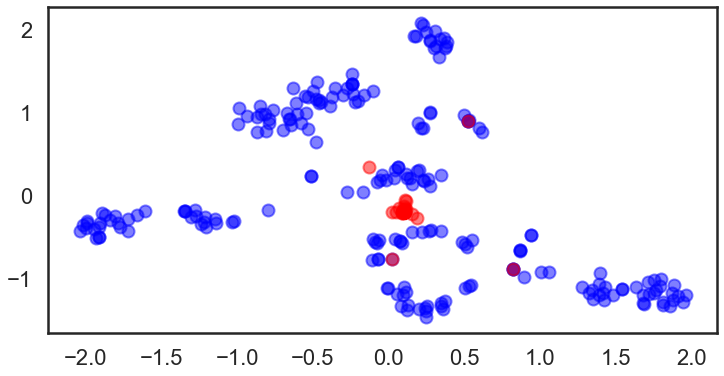

In [24]:
pred2 = pred_tsne_gbr.transform(testFP)
plt.clf()
plt.figure(figsize=(12, 6))
plt.scatter(pred_tsne_gbr.tsne_outputs_[:,0], pred_tsne_gbr.tsne_outputs_[:,1], c='blue', alpha=0.5)
plt.scatter(pred2[:,0], pred2[:,1], c='red', alpha=0.5)

### 予測したデータとHDBSCANのラベルを重ねて眺める

In [25]:
allmol = train_mol + test_mol
fps2 = []
clusterer2 = HDBSCAN(algorithm='best', min_samples=5, metric='pyfunc', func=tanimoto_dist)
for mol in allmol:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fps2.append(arr)
fps2 = np.array(fps2)

#### oがテストデータ xがトレニングデータ。色はHDBSCANのラベルに対応。トレーニング、テストどちらも同じ色が集まっているのでこの予測モデルはまあまあうまく予測していると考えて良い

<Figure size 432x288 with 0 Axes>

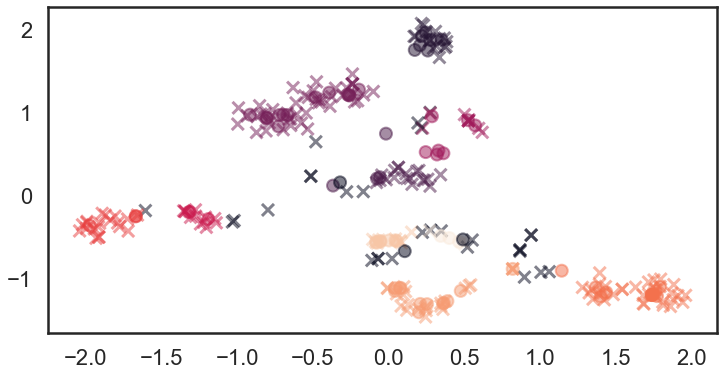

In [26]:
clusterer2.fit(fps2)
plt.clf()
plt.figure(figsize=(12, 6))
plt.scatter(pred_tsne_rfr.tsne_outputs_[:,0], pred_tsne_rfr.tsne_outputs_[:,1], c=clusterer2.labels_[:len(trainFP)], alpha=0.5, marker='x')
plt.scatter(pred1[:,0], pred1[:,1], c=clusterer2.labels_[len(trainFP):], alpha=0.5, marker='o')